In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Interactions entre l’homme et la machine sur le Web</center></span>

## C. Protocole HTTP et web dynamique

Après avoir vu comment créer des **pages web statiques, interactives ou non**, nous allons à présent nous pencher sur la création de **pages web dynamiques**.

Une page web est dite **dynamique** lorsque son **code HTML est généré à la demande**, en fonction de qui en fait la demande, de l'heure de la demande, du lieu d'où provient la demande, ...

Pour expliquer comment cela fonctionne, il nous faudra rentrer dans le détail du modèle de fonctionnement **Client/Serveur**.

### I. Le modèle client/serveur

#### 1. L'analogie du restaurant

Vous savez comment ça fonctionne un **restaurant** ? Et bien là, c'est pareil ... ou presque.

Dans un restaurant, il y a des **humains**. Certains sont **clients**, d'autres sont **serveurs**, mais ce sont tous des humains. Et dans un autre restaurant, celui qui était client peut être le serveur et inversement.

En tant que client, vous ne vous servez pas directement en cuisine. **Si vous voulez quelque chose, vous demandez au serveur** et s'il estime que vous êtes un "client valable" (solvable ou assez aimable ou majeur pour de l'alcool), il **ira vous le chercher pour vous en cuisine et vous l'amènera à table**. A condition que le plat soit à la carte bien sûr.

Pour finir, vous **choisissez votre restaurant en fonction de ce que vous voulez manger**. En effet, vous risquez de rester sur votre faim si vous allez commander des plats chinois dans un restaurant italien.

En **informatique**, les humains sont remplacés par des **ordinateurs**. Certains peuvent être **tantôt client**, **tantôt serveur**, mais ce sont toujours des ordinateurs.

Quand un ordinateur a **besoin d'une ressource** (un plat), c'est un **client**.

**Pour l'obtenir**, il va **s'adresser à un serveur** mais pas n'importe lequel, celui qui est **censé disposer de cette ressource** (le bon restaurant). Sur le **Web**, le **client** est l'ordinateur qui exécute le **navigateur** et le "bon" **serveur est identifié grâce à son adresse IP** qui correspond à l'URL entrée dans la barre de navigation.

Quand le **client adresse sa requête au serveur**, ce dernier commence par décider s'il est **autorisé à fournir des ressources à ce client** (client valable). Mais sur le Web, la plupart des serveurs servent tout le monde, sans distinction.

Si oui, il vérifie s'il **dispose de la ressource demandée** (plat à la carte) et dans l'affirmative, il **l'envoie au client**.

Ce mode de **fonctionnement Client/Serveur est à la base du Web** mais se retrouve aussi dans d'autres domaines de l'informatique. 

#### 2. Sur le Web

Lorsque vous naviguez sur le Web, **vous et votre navigateur êtes donc le client** et, en **cliquant sur des liens hypertextes**, vous passez votre temps à **envoyer des requêtes à des serveurs web** potentiellement situés sur toute la planète.

En réalité, les **géants du Web** que sont Google, Amazon, ... et d'autres moins connus du grand public (comme OVH en France) possèdent de **gigantesques data centers** qui **regroupent un grand nombre de serveurs**.
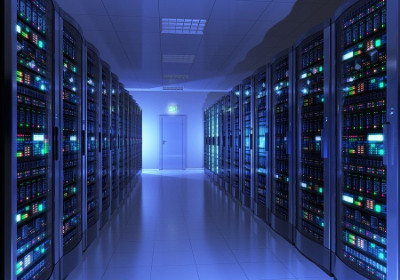

En réunissant ces serveurs dans ces entrepôts **répartis à travers le monde**, on permet à vos **requêtes Web d'être traitées bien plus rapidement** en leur évitant de traverser sans arrêt la planète entière.

Les **serveurs des data centers sont des ordinateurs comme les autres**, constitués de microprocesseurs, de RAM, de disques durs, ... mais leurs **caractéristiques sont adaptées à leur rôle** (pas de carte graphique mais de gros disques durs par exemple).
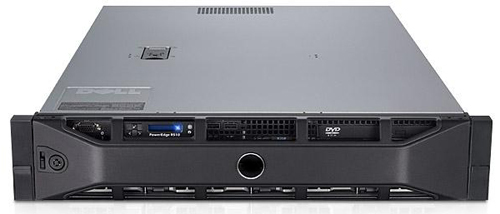

Afin de gagner de la place, ils sont **disposées dans de grandes armoires** appelées **baies serveur**.

N'étant pas destinés à être directement manipulés par un utilisateur, ils ne disposent par défaut de **presqu'aucun périphériques d'entrées et de sortie** (ni écran, ni clavier, ni souris, ...). Ce qui compte est qu'ils soient **connectés (et bien connectés) à Internet**.

#### 3. Un serveur web dynamique

Lorsque vous accédez à une **page web dynamique**, la **page web n'existe pas encore quand vous envoyez votre requête**. C'est **l'arrivée de votre requête** sur le serveur qui va **déclencher sa fabrication** par le serveur.

Pour revenir à notre **analogie culinaire**, c'est comme si c'était **votre commande qui déclenchait la confection de votre plat**. Vous me direz que c'est un peu la base pour un restaurant, mais je vous ferai remarquer que les McDo se targuent bien d'être aussi des restaurants ...

Pour que le serveur puisse **générer la page HTML**, il doit **exécuter un programme dont le résultat est le fichier texte souhaité**.

Cela peut se faire dans de **multiples langages** mais le **plus utilisé est le langage PHP**.

#### 3. Exemple de code PHP minimaliste

Voici un bout de code en PHP :

    <?php
    $heure = date("H:i");
    echo '<h1>Bienvenue sur mon site</h1>
          <p>Il est '.$heure.'</p>';
    ?>

On **reconnait les balises du code HTML** généré. On voit aussi que dans ce code HTML une **variable** `$heure` est utilisée et on devine que la première ligne du **programme PHP permet d'affecter l'heure courante à cette variable**.

Concrêtement, si j'envoie une requête à ce serveur et qu'il est 18h23, j'obtiendrai la page suivante :
<h1>Bienvenue sur mon site</h1>
<p>Il est 18h23</p>

Mais si je rafraichis la page 5 minutes plus tard j'obtiendrai :
<h1>Bienvenue sur mon site</h1>
<p>Il est 18h28</p>

**Remarque importante :**

On pourrait sans doute obtenir le **même résultat avec du JavaScript**. La différence fondamentale est que dans ce cas, le serveur fournirait toujours exactement la même page HTML. C'est **l'éxécution du code JavaScript sur mon ordinateur qui modifierait le code HTML**. Dans ce cas, le **code est exécuté coté client** alors qu'**avec PHP il est exécuté côté serveur**.

Dans ce cet exemple simplissime, cela ne change sans doute pas grand chose mais si le code devient plus conséquent et que nous sommes des milliers à solliciter le serveur simultanément, cela peut faire une sacré différence !

### II. Relation Client/Serveur en HTTP

Puisque le but de ce chapitre est de s'intéresser aux IHM sur le Web, regardons de plus près ce qu'il se passe lorsque nous naviguons avec le protocole HTTP.

#### 1. Les protocoles de communication

Comme tous les **protocoles de communication**, le protocole HTTP est un **ensemble de règles qui permettent à deux entités, ici des ordinateurs, de communiquer**.

Dans votre vie de tous les jours, **vous utilisez tout le temps des protocoles de communication**.

Par exemple, vous savez que si vous voulez **demander l'heure à quelqu'un dans la rue**, vous devez commencer par **initialiser la communication** en le saluant d'un "Bonjour". Vous savez que vous aurez plus de chance d'**obtenir une réponse** en mettant un "S'il vous plait" à la fin de la question. Vous savez aussi qu'un "Merci, au revoir." devrait permettre de **mettre fin à la communication**.

Le fameux "Allo" de vos conversations téléphoniques appartient aussi à un protocole de communication, tout comme le fait de lever le doigt en classe pour poser une question, ... 

#### 2. Le protocole HTTP

Le "http://" qui commence une **URL** signifie que votre **navigateur**, en tant que **client**, souhaite **utiliser le protocole HTTP** (HyperText Transfert Protocol) **pour communiquer avec le serveur**.

Ensuite, la "conversation" entre votre navigateur et le serveur va se résumer à une série de **requêtes HTTP envoyées par votre navigateur**, auxquelles le **serveur va répondre avec des réponses HTTP**.

#### 3. La requête HTTP

Une **requête HTTP** du client vers le serveur est un **ensemble de données de type texte** comportant notamment :
- la **méthode** employée pour effectuer la requête,
- l'**URL** de la ressource demandée,
- la **version du protocole** utilisé par le client (souvent HTTP 1.1),
- le **navigateur** employé par le client (Firefox, Chrome, ...) et sa version,
- le **type de document** demandé (par exemple HTML),
...

**Exemple de requête :**

    GET /mondossier/monFichier.html HTTP/1.1
    User-Agent : Mozilla/5.0
    Accept : text/html

Dans cette requête, la ressource */mondossier/monFichier.html* est demandée par la méthode *GET* à l'aide du protocole *HTTP/1.1* par un navigateur *Mozilla* en version *5.0*, qui s'attend à recevoir en retour des données de type *text* ou *HTML*.

#### 4. Les méthodes utilisées en HTTP

La **méthode** indique à quel **genre d'action correspond une requête**.

Les **méthodes disponibles** en HTML sont : GET, HEAD, POST, OPTIONS, CONNECT, TRACE, PUT, PATCH, DELETE.

Les **plus courantes** sont GET, POST, PUT et DELETE.

- GET est de la loin la **méthode la plus utilisée** car c'est elle qui permet de **demander une ressource au serveur** (commander un plat). Mais on verra qu'elle peut **aussi permettre d'envoyer de l'information au serveur**.

- POST est en général utilisée pour les **formulaires à remplir en ligne**, elle **permet d'envoyer des données au serveur** (la cuisson de la viande).

- DELETE et PUT permettent de **supprimer ou de modifier une ressource sur le serveur**. Comme l'essentiel de notre activité sur le Web consiste à récupérer des pages et remplir des formulaires (GET et POST), elles sont **nettement moins utilisées**. D'autant plus qu'il est possible de faire à peu près la même chose avec GET et POST.

#### 5. La réponse HTTP

Voici maintenant un exemple de réponse en HTTP :

    HTTP/1.1 200 OK
    Date: Thu, 15 feb 2019 12:02:32 GMT
    Server: Apache/2.0.54 (Debian GNU/Linux) DAV/2 SVN/1.1.4
    Connection: close
    Transfer-Encoding: chunked
    Content-Type: text/html; charset=ISO-8859-1
    <!doctype html>
    <html lang="fr">
    <head>
    <meta charset="utf-8">
    <title>Voici mon site</title>
    </head>
    <body>
     <h1>Hello World! Ceci est un titre</h1>
    <p>Ceci est un <strong>paragraphe</strong>. Avez-vous bien compris ?</p>
    </body>
    </html>

Cette réponse se décompose en une **en-tête** qui contient des **informations sur la nature de la réponse** et un **corps** qui contient les **données demandées**, ici une page HTML.

Dans l'en-tête, on retrouve, comme pour la requête le protocole utilisé (*HTTP/1.1*), le type de données (*text/html*) ainsi que le nom et la version du logiciel utilisé sur le serveur pour générer cette réponse. Ici il s'agit d'un serveur *Apache* (comme plus de la moitié des serveurs web dans le monde) en version *2.0.54* qui tourne sous une distribution *Debian* de *Linux* (DAV et SVN des modules attachés au serveur Apache).

Plus intéressant, *200 OK* indique que la **requête a été traitée avec succès** (nous y reviendrons très bientôt).

De façon plus **anecdotique**, l'en-tête précise aussi la date et l'heure de la réponse ainsi que l'encodage utilisé pour les caractères.

#### 6. Les codes de réponse HTTP

Vous trouverez [ici](https://developer.mozilla.org/fr/docs/Web/HTTP/Status) l'ensemble des codes de réponse possibles en HTTP.

Nous n'allons pas tous les détailler (il y en plus de 60) mais en voici quelques uns parmi les **principaux** :
- `200 OK` : la requête, quelle qu'elle soit, a **réussi**.
- `404 Not Found` (la fameuse erreur 404) : la ressource demandée n'a **pas pu être trouvée** sur le serveur.
- `403 Forbidden` : la ressource existe mais le **client n'est pas autorisé** à y accèder
- `503 Service Unavailable` : le serveur ne **parvient pas à traiter la requête** (maintenance ou surcharge en général).


### III. Le protocole HTTPS

Le protocole **HTTPS** a la **même fonction que HTTP** sauf qu'il le fait de **manière sécurisée**. Cela signifie qu'au lieu de transmettre les données simplement sous forme de texte lisible par n'importe qui, il utilise des **algorithmes de cryptage pour chiffrer les données de les envoyer sur Internet**.

#### 1. Principes de HTTPS

Lorsqu'un **client** envoie une **requête en HTTPS** :
- le **serveur** répond qu'il est **OK** (ou pas) pour communiquer de façon sécurisée.
- le **serveur fournit un certificat de sécurité** pour prouver son identité (cela permet de lutter contre les attaque de type *man in the middle*).
- des **clés de chiffrement sont échangées** afin de permettre à chacun de crypter et décrypter les données échangées.
- les **échanges de requêtes et de réponses** ont lieu normalement mais avec des **données cryptées** que seul ce client et ce serveur peuvent décrypter.

#### 2. Utilisation de HTTPS

HTTPS étant un peu plus lourd que le protocole HTTP normal, il était **au départ réservé aux communications de données sensibles avec les sites des banques et les sites marchands**.

Mais avec la généralisation des sites qui nous demandent de créer un compte pour nous identifier, le **protocole HTTPS tend lui aussi à se généraliser** de plus en plus.

Aujourd'hui il est très **rare de rencontrer un site web commercial qui ne soit pas en HTTPS**, notamment car ceux qui ne le sont pas sont nettement moins bien référencés dans les moteurs de recherche.

Pour mettre en application tout ça, nous allons faire 2 TD :
- un [TD]() sur les **formulaires HTML** et les **pages web dynamiques** en utilisant un serveur web crée avec Python
- un [TD]() pour analyser les **requêtes HTTP** sur un réseau virtuel simulé grâce au logiciel Filius.